<a href="https://colab.research.google.com/github/kevingray92/ATMS-597-Project-5/blob/all_data/Logistic_Regression_alldata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from datetime import datetime

In [11]:
### Read one year data file
#decoded_metar_master = pd.read_csv('/content/drive/My Drive/decoded_metar_master.csv')

### Read all years data file
filename = '/content/drive/My Drive/Colab Notebooks/ATMS-597/Project05/decoded_metar_dataset.csv'
decoded_metar_master = pd.read_csv(filename,dtype={'current_wx1':str})

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
#decoded_metar_master['current_wx1'].unique
decoded_metar_master

,date_time,station_id,latitude,longitude,elevation,date_time.1,wind_direction,wind_speed,current_wx1,current_wx2,current_wx3,low_cloud_type,low_cloud_level,medium_cloud_type,medium_cloud_level,high_cloud_type,high_cloud_level,highest_cloud_type,highest_cloud_level,cloud_coverage,air_temperature,dew_point_temperature,altimeter,present_weather,past_weather,past_weather2,air_pressure_at_sea_level,eastward_wind,northward_wind
0,2000-01-01 00:50:00,KMSN,43.13,-89.35,261,2000-01-01 00:50:00,NaN,5.0,-SN,NaN,NaN,FEW,2000.0,OVC,2700.0,NaN,NaN,NaN,NaN,8,-6.0,-9.0,29.92,71,0,0,NaN,NaN,NaN
1,2000-01-01 00:55:00,KMSN,43.13,-89.35,261,2000-01-01 00:55:00,320.0,6.0,-SN,NaN,NaN,BKN,2700.0,OVC,3300.0,NaN,NaN,NaN,NaN,8,-6.0,-9.0,29.92,71,0,0,NaN,3.856726,-4.596267
2,2000-01-01 01:00:00,KMSN,43.13,-89.35,261,2000-01-01 01:00:00,340.0,7.0,-SN,NaN,NaN,SCT,2700.0,OVC,3300.0,NaN,NaN,NaN,NaN,8,-5.0,-9.0,29.92,71,0,0,NaN,2.394141,-6.577848
3,2000-01-01 01:05:00,KMSN,43.13,-89.35,261,2000-01-01 01:05:00,330.0,10.0,-SN,NaN,NaN,SCT,2700.0,OVC,3300.0,NaN,NaN,NaN,NaN,8,-5.0,-10.0,29.92,71,0,0,NaN,5.000000,-8.660254
4,2000-01-01 01:10:00,KMSN,43.13,-89.35,261,2000-01-01 01:10:00,320.0,8.0,-SN,NaN,NaN,FEW,2700.0,OVC,3300.0,NaN,NaN,NaN,NaN,8,-6.0,-10.0,29.93,71,0,0,NaN,5.142301,-6.128356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412969,2019-12-31 15:25:00,KMSN,43.13,-89.35,261,2019-12-31 15:25:00,300.0,8.0,-SN,NaN,NaN,OVC,1800.0,NaN,NaN,NaN,NaN,NaN,NaN,8,-4.0,-8.0,29.69,71,0,0,NaN,6.928203,-4.000000
412970,2019-12-31 15:30:00,KMSN,43.13,-89.35,261,2019-12-31 15:30:00,300.0,9.0,-SN,NaN,NaN,OVC,1800.0,NaN,NaN,NaN,NaN,NaN,NaN,8,-4.0,-8.0,29.69,71,0,0,NaN,7.794229,-4.500000
412971,2019-12-31 15:35:00,KMSN,43.13,-89.35,261,2019-12-31 15:35:00,300.0,8.0,-SN,NaN,NaN,OVC,1800.0,NaN,NaN,NaN,NaN,NaN,NaN,8,-4.0,-8.0,29.69,71,0,0,NaN,6.928203,-4.000000
412972,2019-12-31 15:40:00,KMSN,43.13,-89.35,261,2019-12-31 15:40:00,290.0,10.0,-SN,NaN,NaN,OVC,1800.0,NaN,NaN,NaN,NaN,NaN,NaN,8,-4.0,-8.0,29.69,71,0,0,NaN,9.396926,-3.420201


In [0]:
#decoded_metar_master = decoded_metar_master.dropna(axis=0, subset=['current_wx1','air_temperature'])

## Drop columns we don't plan on using or have too many NaNs
decoded_metar_master = decoded_metar_master.drop(['low_cloud_type',	'low_cloud_level',	'medium_cloud_type',	'medium_cloud_level',	'high_cloud_type',	'high_cloud_level',	'highest_cloud_type',	'highest_cloud_level',	'cloud_coverage', 'air_pressure_at_sea_level'], axis=1)

#decoded_metar_master = decoded_metar_master.dropna(axis=0)

In [14]:
#convert current_wx columns to list and also check how many rows we have 
current_wx1 = decoded_metar_master['current_wx1'].to_list()
print(len(current_wx1))
current_wx2 = decoded_metar_master['current_wx2'].to_list()
print(len(current_wx2))
current_wx3 = decoded_metar_master['current_wx3'].to_list()
print(len(current_wx3))

#Check to make sure we have some frozen AND liquid weather reported
print(current_wx1[0:50])

412974
412974
412974
['-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', '-SN', 'HZ', '-SN', '-SN', '-SN', '-RA', '-RA', '-RA', 'RA', '-RA', '-RA', '-RA', 'BR', 'BR', 'BR']


In [0]:
### List of frozen and liquid precip options
fzn_list = ['-SNRA','SNRA','+SNRA','-SN','SN','+SN','-FZDZ','FZDZ','+FZDZ','-FZRA','FZRA','+FZRA','-FZFG','FZFG','+FZFG','-IC','IC','+IC','-GR','GR','GR','-SG','SG','+SG','-PL','PL','+PL']
liq_list = ['-RA','RA','+RA','-BR','BR','+BR','-TS','TS','+TS','-TSRA','TSRA','+TSRA']

In [0]:
### Set up a list to hold binary values (1 for frozen, 0 for liquid)
binary_list = []

### Loop over current_wx observations and determin if any are frozen precip. If so, set binary variable to 1. If not, set binary variable to 0.
for i in range(len(current_wx1)):
    if (current_wx1[i] in fzn_list) or (current_wx2[i] in fzn_list) or (current_wx3[i] in fzn_list):
        binary_list.append(1)
    else:
        binary_list.append(0)

In [17]:
### Fill a new column called 'fzn_or_liq' with the binary values.
decoded_metar_master['fzn_or_liq'] = binary_list

### Then drop current_wx2 and current_wx3 because they hold a lot of NaNs
decoded_metar_master = decoded_metar_master.drop(['current_wx2',	'current_wx3'], axis=1)
### Then drop all other rows with NaNs
decoded_metar_master = decoded_metar_master.dropna(axis=0)
### Check how many rows we are left with after cleaning up the dataframe
current_wx1 = decoded_metar_master['current_wx1'].to_list()
print(len(current_wx1))

389459


In [0]:
### Split data 70/30 between training/testing
from sklearn.model_selection import train_test_split
predictor_cols = ['air_temperature']
target_cols = ['fzn_or_liq']
X = decoded_metar_master[predictor_cols]
Y = decoded_metar_master[target_cols]
training_predictor, test_predictor, training_target, test_target = train_test_split(X, Y, test_size=0.3)

In [0]:
##training_target = training_predictor
##test_target = test_predictor
##training_target.drop(['date_time', 'station_id',	'latitude',	'longitude',	'elevation',	'wind_direction',	'wind_speed',	'current_wx1',	'current_wx2',	'current_wx3',	'low_cloud_type',	'low_cloud_level',	'medium_cloud_type',	'medium_cloud_level',	'high_cloud_type',	'high_cloud_level',	'highest_cloud_type',	'highest_cloud_level',	'cloud_coverage',	'air_temperature',	'dew_point_temperature',	'altimeter',	'present_weather',	'past_weather',	'past_weather2',	'air_pressure_at_sea_level',	'eastward_wind',	'northward_wind'], axis=1)
##test_target.drop(['date_time', 'station_id',	'latitude',	'longitude',	'elevation',	'wind_direction',	'wind_speed',	'current_wx1',	'current_wx2',	'current_wx3',	'low_cloud_type',	'low_cloud_level',	'medium_cloud_type',	'medium_cloud_level',	'high_cloud_type',	'high_cloud_level',	'highest_cloud_type',	'highest_cloud_level',	'cloud_coverage',	'air_temperature',	'dew_point_temperature',	'altimeter',	'present_weather',	'past_weather',	'past_weather2',	'air_pressure_at_sea_level',	'eastward_wind',	'northward_wind'], axis=1)
##training_predictor.drop(['fzn_or_liq'], axis=1)
##test_predictor.drop(['fzn_or_liq'], axis=1)

In [0]:
from sklearn.linear_model import LogisticRegression


In [0]:
### put air_temperature values in an array
training_predictor_array = training_predictor['air_temperature'].values
test_predictor_array = test_predictor['air_temperature'].values

In [0]:
# Initiate the model using the default parameters
logreg = LogisticRegression()

# Fit the model
#logreg.fit(training_predictor_array.reshape(-1,1), training_target['fzn_or_liq'])
logreg.fit(training_predictor_array.reshape(-1,1), training_target['fzn_or_liq'])

# Predictions
ptype_predict=logreg.predict(test_predictor_array.reshape(-1,1))
predsprob = logreg.predict_proba(test_predictor_array.reshape(-1,1))

In [0]:
#print(len(predsprob))
prob0 = []
prob1 = []
for i in range(len(predsprob)):
    prob0.append(predsprob[i][0])
    prob1.append(predsprob[i][1])

In [24]:
# Check skill with confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_target['fzn_or_liq'], ptype_predict)
cnf_matrix

array([[84504,  6878],
       [11596, 13860]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 257.44, 'Predicted label')

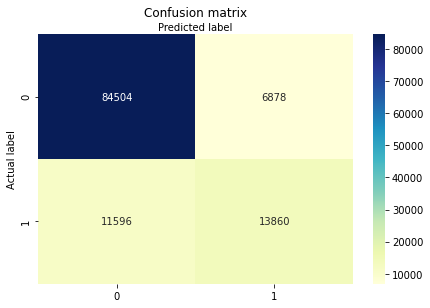

In [25]:
# Plot confusion matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
# Other performance metrics

#Jaccard Index, want this to be close to one
from sklearn.metrics import jaccard_similarity_score
j_index = jaccard_similarity_score(y_true=test_target['fzn_or_liq'],y_pred=ptype_predict)
round(j_index,2)

# F1-score
from sklearn.metrics import f1_score
f1_score(test_target['fzn_or_liq'], ptype_predict)

# Brier skill score
##from sklearn.metrics import brier_score_loss
##log_score = brier_score_loss((test_target['fzn_or_liq'].values).reshape(-1,1), predsprob[:][0])
##print('Brier:',log_score)
from sklearn.metrics import brier_score_loss
log_score = brier_score_loss(test_target['fzn_or_liq'],prob0)
print('Brier:',log_score)

# Precision score
from sklearn.metrics import precision_score
precision_score(test_target['fzn_or_liq'], ptype_predict)

Brier: 0.6983914977578308


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6683383161346321